In [10]:
message=FALSE #supress warning
load("dataset/vrawu17.RData")

# Analisando os atrasos de partida

Para esta análise utilizaremos atrasos, de voos realizados, em um intervalo de 15m até 4h, pois são os atrasos mais comuns, os maiores que 4 horas apresentão consequências mais severas as empresas de aviação, de acordo com a ANAC as empresas tem que tomar as seguintes providências:

> - **A partir de 1 hora**: comunicação (internet, telefonemas, etc).
>- **A partir de 2 horas**: alimentação (voucher, lanche, bebidas, etc).
>- **A partir de 4 horas**: acomodação ou hospedagem (se for o caso) e transporte do aeroporto ao local de acomodação. Se você estiver no local de seu domicílio, a empresa poderá oferecer apenas o transporte para sua residência e desta para o aeroporto.


> **O passageiro pode solicitar reembolso quando ocorrer:**
> - a) Atraso do voo por mais de quatro horas;



Fonte: http://www.anac.gov.br/assuntos/passageiros/atrasos-cancelamento-e-pretericao-de-embarque

In [11]:
atrasos = vrawu17[vrawu17$atraso_partida >15 & 
                  vrawu17$atraso_partida <240 & 
                  vrawu17$situacao_voo=="REALIZADO",]

#### Top 5 aeroportos em contagem de atrasos de partida no brasil

In [12]:
library(dplyr) #%>%
vw_g = atrasos[c("icao_origem")]
vw_g = vw_g %>% group_by(icao_origem) %>% summarize(Count = n())
head(vw_g[order(-vw_g$Count),])

icao_origem,Count
NA,62116
SBGR,20136
SBSP,13643
SBBR,8069
SBKP,6669
SBGL,6374


##### Atrasos no aeroporto de guarulhos
Era de se esperar que o aeroporto de guarulhos 'SBGR' tenha a maior quantidades de atrasos visto que é o maior também em quantidade de voos. Iremos dar aqui um destaque maior para este em específico.

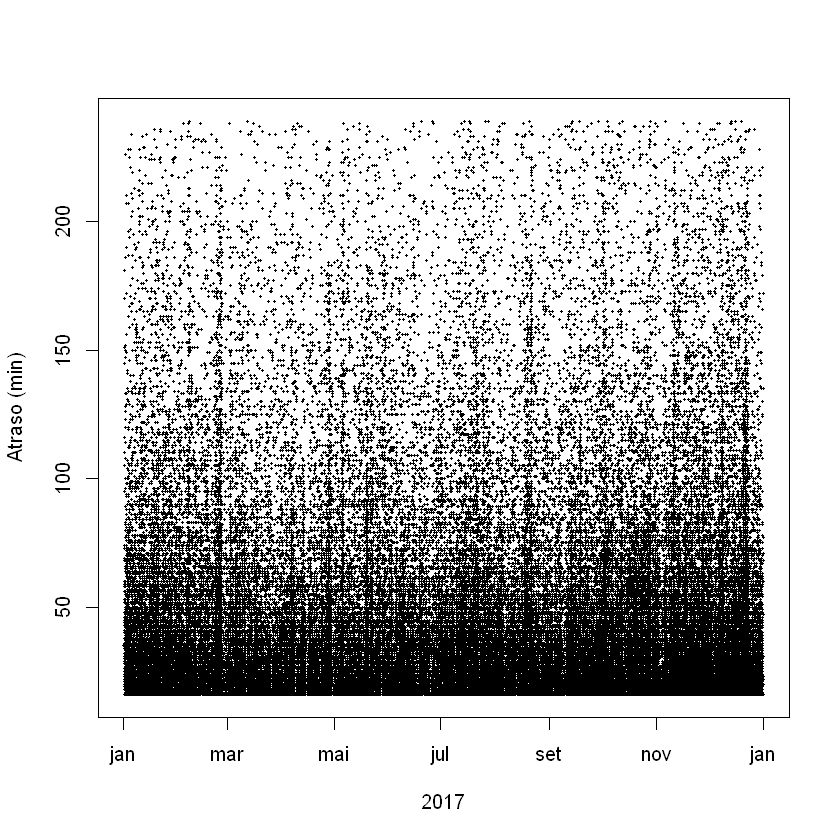

In [13]:
x = atrasos$partida_real
y = atrasos$atraso_partida
plot(x,y,pch=16 , cex=0.3, ylab='Atraso (min)', xlab='2017')

Podemos notar neste gráfico que existe uma concentração maior no período de férias escolares, entre dezembro e fevereiro. Também é interessante notar algumas 'linhas' em datas específicas, isso pode ser explciado com algum feríado ou possívelmente algum problema que tenha ocorrido no aeroporto. Ex:

 - Final de ferereiro - onde acontece o carnaval (dia 28), 
 - Final de abril que pode ser explicado pelo dia do trabalhador em primeiro de maio (segunda feira)

### Histograma de atrasos de partida

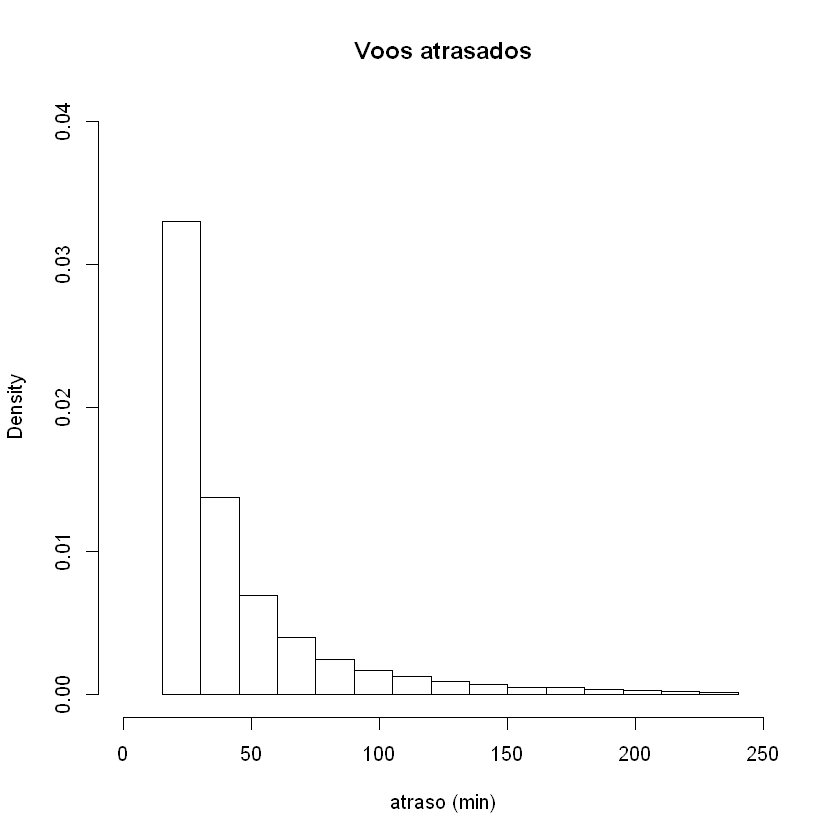

In [14]:
hist(as.numeric(atrasos$atraso_partida)
     ,breaks=seq(15,240,15)
     ,ylim=c(0,0.04)
     ,xlim=c(0,250)
     ,xlab="atraso (min)"
     ,main="Voos atrasados"
     ,freq=FALSE
     )

#### Histograma de horas mais comuns de voos com atraso

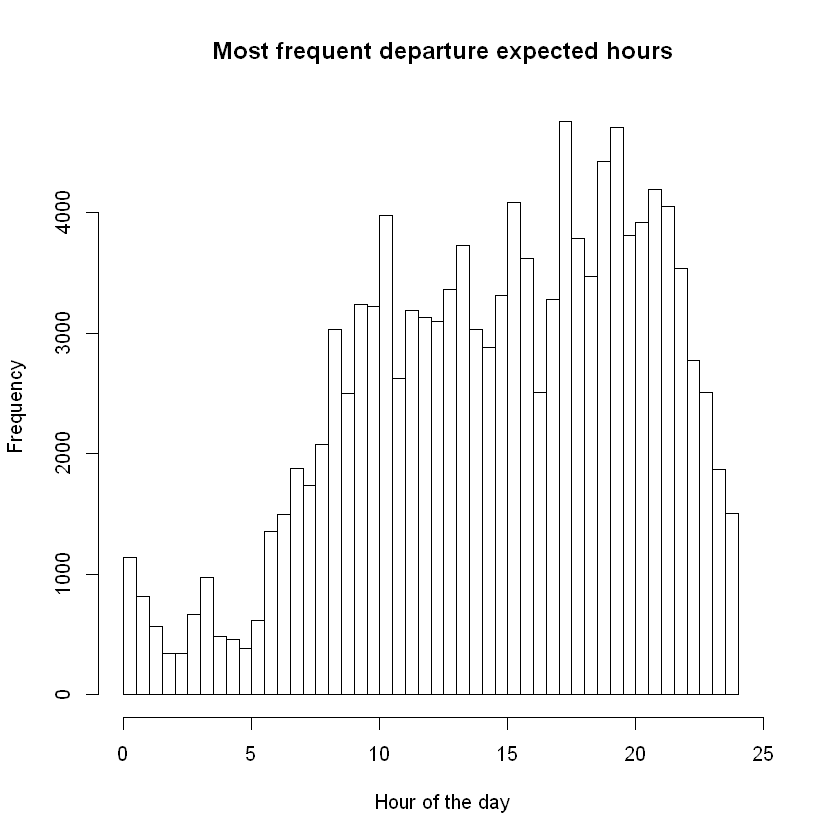

In [15]:
deh = as.POSIXlt(atrasos$partida_prevista)

h=hist(deh$hour+deh$min/60
     ,breaks=seq(0, 24, 0.5)
     ,xlim=c(0,25)
     ,xlab="Hour of the day"
     ,main="Most frequent departure expected hours"
     )
rm(deh)

#### Horas do dia com maior atraso

A fim de evitar atrasos tentamos entender melhor qual hora do dia os voos costumam atrasar mais, para isso pegamos os horários de partida previsto e verificamos em média quanto tempo voos nessa hora costumam atrasar

In [85]:
d_h = atrasos[,c('partida_prevista','atraso_partida')]
d_h = d_h[rowSums(is.na(d_h))==0,]

d_h$por_hora_tempo_partida=cut(as.integer(format(d_h$partida_prevista, "%H")), seq(0,24,1), include.lowest=TRUE, labels=seq(0,23,1))  #seq(0,23,1) )
d_h = d_h %>% group_by(por_hora_tempo_partida) %>% summarize(avg = mean(atraso_partida))

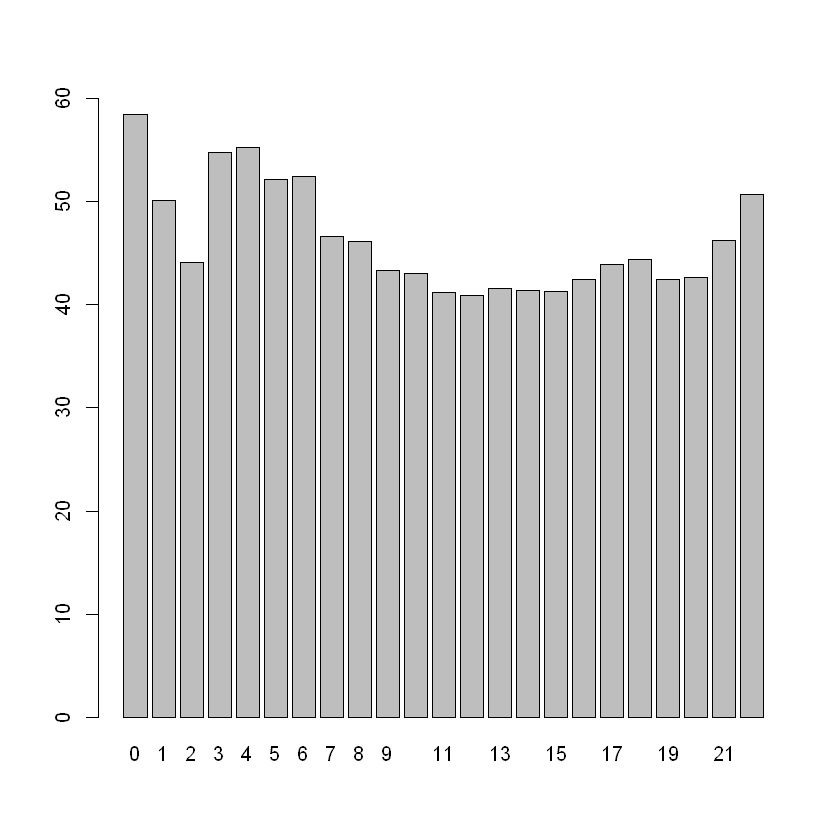

In [98]:
barplot(as.numeric(d_h$avg),names.arg=seq(0,22,1), ylim=c(0,60))
rm(d_h)